# Keras ConvLSTM2D network

Use a network made of convolutional LSTM layers.

In [13]:
import numpy as np
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model
import keras.backend as K
import imageio
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
import random

## Model

In [2]:
#kernel_size = (3,3)
#img_input = Input(shape=(None,None,None,1,))
#x = ConvLSTM2D(32, kernel_size, activation='relu', padding='same', return_sequences=True)(img_input)
#x = BatchNormalization()(x)
#x = ConvLSTM2D(32, kernel_size, activation='relu', padding='same', return_sequences=True)(x)
#x = BatchNormalization()(x)
#x = ConvLSTM2D(32, kernel_size, activation='relu', padding='same', return_sequences=True)(x)
#x = BatchNormalization()(x)
#x = ConvLSTM2D(32, kernel_size, activation='relu', padding='same', return_sequences=True)(x)
#x = BatchNormalization()(x)
#x = ConvLSTM2D(1, kernel_size, activation='softmax', padding='same', return_sequences=False)(x)
#model = Model(inputs=img_input, outputs=x)
#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')
#model.summary()

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, None, None, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

model = seq
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, None, None,  59200     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, None, None,  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, None, None,  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, None, None,  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, None, None,  115360    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, None, None,  160       
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, None, None, None,  115360    
__________

In [3]:
for layer in model.layers:
    print(layer.output_shape)

(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 1)


In [5]:
model = load_model("model/kerasExampleDots.h5")

## Data

Full games are represented as image sequences ("movies"). The network has to predict the next frame of an unfinished sequence.

The input data is the full game without the last state where all lines are filled in. The output data is the full game without the very first state where no lines are drawn.

In [6]:
sequenceDataset = np.load('sequence5x4.npz')
games = sequenceDataset['games']
print(games.shape)

(1000, 49, 11, 13)


In [7]:
x_train = games[:,:-1,:,:]
y_train = games[:,1:,:,:]
print(x_train.shape)
print(y_train.shape)

x_train = x_train.astype(K.floatx())
y_train = y_train.astype(K.floatx())
x_train /= 255
y_train /= 255

(1000, 48, 11, 13)
(1000, 48, 11, 13)


In [8]:
np.set_printoptions(precision=2, suppress=True, linewidth=90)

exampleGameIdx = 23
exampleGameFrame = 42

print(x_train[exampleGameIdx,exampleGameFrame])
print(y_train[exampleGameIdx,exampleGameFrame])

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 0.   0.84 1.   0.84 0.  ]
 [0.   1.   0.59 1.   0.59 1.   0.   0.   0.   1.   0.59 1.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 0.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   1.   0.59 1.   0.59 1.   0.   0.   0.   1.   0.59 1.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 0.   0.84 1.   0.84 0.  ]
 [0.   1.   0.59 1.   0.59 1.   0.   0.   0.   1.   0.25 1.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   1.   0.25 1.   0.25 1.   0.25 1.   0.25 1.   0.25 1.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 0.   0.84 1.   0.84 0.  ]
 [0.   1.   0.59 1.   0.59 1.   0.   0.   0.   1.   0.59 1.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 0.   0.84 1.   

In [9]:
channel_shape = x_train.shape + (1,)
x_train = x_train.reshape(channel_shape)
#cat_shape = y_train.shape + (2,)
#y_train = to_categorical(y_train).reshape(cat_shape)
cat_shape = y_train.shape + (1,)
y_train = y_train.reshape(cat_shape)
print(x_train.shape)
print(y_train.shape)
print(np.transpose(x_train[exampleGameIdx,exampleGameFrame,:,:,0]))
print(np.transpose(y_train[exampleGameIdx,exampleGameFrame,:,:,0]))
#print(np.transpose(y_train[exampleGameIdx,exampleGameFrame,:,:,1]))

(1000, 48, 11, 13, 1)
(1000, 48, 11, 13, 1)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   1.   0.59 1.   0.59 1.   0.59 1.   0.25 1.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   1.   0.59 1.   0.59 1.   0.59 1.   0.25 1.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   1.   0.   0.   0.   1.   0.   1.   0.25 1.   0.  ]
 [0.   0.84 0.   0.84 0.   0.84 0.   0.84 1.   0.84 0.  ]
 [0.   0.   0.   1.   0.   0.   0.   1.   0.25 1.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   1.   0.59 1.   0.59 1.   0.25 1.   0.25 1.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   1.   0.59 1.   0.59 1.   0.59 1.   0.25 1.   0.  ]
 [0.   0.84 1.   0.84 1.   

## Training

In [8]:
#model.fit(x_train[0:8:1,:,:,:,:], y_train[0:8:1,:,:,:,:], epochs=50, batch_size=16)
model.fit(x_train[:900], y_train[:900], batch_size=10,
        epochs=200, validation_split=0.05)


Train on 855 samples, validate on 45 samples
Epoch 1/200
855/855 [==============================] - 50s - loss: 0.2623 - val_loss: 0.5905
Epoch 2/200
855/855 [==============================] - 48s - loss: 0.1806 - val_loss: 0.4529
Epoch 3/200
855/855 [==============================] - 48s - loss: 0.1484 - val_loss: 0.3598
Epoch 4/200
855/855 [==============================] - 48s - loss: 0.1271 - val_loss: 0.3694
Epoch 5/200
855/855 [==============================] - 48s - loss: 0.1193 - val_loss: 0.2867
Epoch 6/200
855/855 [==============================] - 48s - loss: 0.1173 - val_loss: 0.1731
Epoch 7/200
855/855 [==============================] - 48s - loss: 0.1157 - val_loss: 0.1300
Epoch 8/200
855/855 [==============================] - 48s - loss: 0.1150 - val_loss: 0.1152
Epoch 9/200
855/855 [==============================] - 48s - loss: 0.1145 - val_loss: 0.1151
Epoch 10/200
855/855 [==============================] - 48s - loss: 0.1143 - val_loss: 0.1141
Epoch 11/200
855/855 [==

855/855 [==============================] - 48s - loss: 0.1115 - val_loss: 0.1118
Epoch 174/200
855/855 [==============================] - 48s - loss: 0.1116 - val_loss: 0.1119
Epoch 175/200
855/855 [==============================] - 48s - loss: 0.1116 - val_loss: 0.1117
Epoch 176/200
855/855 [==============================] - 48s - loss: 0.1116 - val_loss: 0.1117
Epoch 177/200
855/855 [==============================] - 48s - loss: 0.1116 - val_loss: 0.1117
Epoch 178/200
855/855 [==============================] - 48s - loss: 0.1116 - val_loss: 0.1117
Epoch 179/200
855/855 [==============================] - 48s - loss: 0.1116 - val_loss: 0.1120
Epoch 180/200
855/855 [==============================] - 48s - loss: 0.1117 - val_loss: 0.1119
Epoch 181/200
855/855 [==============================] - 48s - loss: 0.1116 - val_loss: 0.1116
Epoch 182/200
855/855 [==============================] - 48s - loss: 0.1116 - val_loss: 0.1116
Epoch 183/200
855/855 [==============================] - 48s - l

(1, 20, 11, 13, 1)
(11, 13)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.74 1.   0.7  0.74 0.64 0.27 0.61 0.33 0.75 1.   0.8  0.  ]
 [0.   0.32 0.04 0.12 0.02 0.04 0.03 1.   0.05 1.   0.1  0.79 0.  ]
 [0.   0.76 0.5  0.75 1.   0.71 0.97 0.69 0.2  0.68 0.34 0.79 0.  ]
 [0.   1.   0.09 0.06 0.05 0.09 0.03 0.99 0.04 0.98 0.05 1.   0.  ]
 [0.   0.83 0.5  0.77 1.   0.71 0.19 0.65 0.15 0.73 0.18 0.76 0.  ]
 [0.   1.   0.11 0.08 0.06 0.12 0.02 0.98 0.04 0.99 0.06 0.61 0.  ]
 [0.   0.86 1.   0.76 1.   0.78 0.52 0.69 0.24 0.74 1.   0.78 0.  ]
 [0.   0.35 0.06 0.14 0.07 1.   0.05 0.26 0.01 0.15 0.04 0.17 0.  ]
 [0.   0.77 1.   0.78 0.77 0.77 1.   0.78 0.63 0.67 0.48 0.73 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.84 1.   0.84 0.   0.84 0.   0.84 0.   0.84 1.   0.84 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   1.   0.   0.   0.  ]
 [0.   0.84 1.   0.

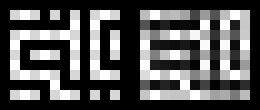

In [23]:
example = random.randrange(x_train.shape[0])
exampleFrame = 20
input_data = np.array([x_train[example,0:exampleFrame,::,::,::]])
prediction = model.predict(input_data)
print(prediction.shape)
prediction = prediction[0,-1, ::, ::, 0]
print(prediction.shape)

print(prediction)

print(x_train[example,exampleFrame,::,::,0])

# create image
target_imgdata = x_train[example,exampleFrame,::,::,0] * 255
target_imgdata = target_imgdata.astype(np.uint8)

prediction_imgdata = prediction * 255
prediction_imgdata = prediction_imgdata.astype(np.uint8)

# merge image data in color channels
tmp = np.zeros(prediction.shape, dtype=np.uint8)
merged_imgdata = np.stack([target_imgdata, prediction_imgdata, tmp], axis=2)
merged_imgdata_large = np.append(target_imgdata, prediction_imgdata, axis=1)
print(merged_imgdata_large.shape)

#create image
img = Image.fromarray(merged_imgdata, 'RGB')
img = Image.fromarray(merged_imgdata_large, 'P')
img = img.resize(size=(img.size[0]*10, img.size[1]*10))

img

In [10]:
#model.save('model/kerasExampleDots2.h5')

In [ ]:
target_imgdata = x_train[example,:,:,0] * 255
target_imgdata = target_imgdata.astype(np.uint8)

prediction_imgdata = prediction[0] * 255
prediction_imgdata = prediction_imgdata.astype(np.uint8)

# merge image data in color channels
tmp = np.zeros((prediction[0].shape[0], prediction[0].shape[1]), dtype=np.uint8)
merged_imgdata = np.stack([target_imgdata, prediction_imgdata[:,:,1], tmp], axis=2)

#create image
img = Image.fromarray(merged_imgdata, 'RGB')
img = img.resize(size=(img.size[0]*10, img.size[1]*10))

img